In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
project_dir = 'C:\\Users\\PLDD\\python\\Python\\ML\\Kaggle\\house_price'
raw_path = os.path.join(project_dir,'data','raw')
train_path = os.path.join(raw_path, 'train.csv')
test_path = os.path.join(raw_path, 'test.csv')

print(raw_path)

C:\Users\PLDD\python\Python\ML\Kaggle\house_price\data\raw


In [260]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
test_df['SalePrice'] = 0.0
df = train_df.append(test_df)
yearlable = ['1910','1940', '1960', '1975', '1990', '2000', '2011']
yearbin = [1872, 1910, 1940, 1960, 1975, 1990, 2000, 2010]
yearlable = ['1935', '1950', '1989', '2011']
yearbin = [1900,1935, 1950, 1989, 2011]
df['YearInt']=pd.cut(x = df['YearBuilt'].values, bins = yearbin, right = False, labels = yearlable)

In [136]:
vv=df.select_dtypes(include = ['object'])
ww=vv.isnull().any(0)
rr=ww[ww].index.values
num = df.select_dtypes(exclude = ['object'])
n1 = num.isnull().any(0)
n2 = num.columns[n1]
#num[n2].info()

In [137]:
DefSeqCat = ['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature']
UndefSeqCat1 = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd','Electrical', 'KitchenQual',
            'Functional', 'SaleType'] # there are defenetly lost elements 
UndefSeqCat2 = ['MasVnrType'] # i may just not make it clear the property of the column
UndefSeqNum = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
               'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

replace=dict.fromkeys(DefSeqCat, 'NoNe')
tt_df=train_df.copy()
tt_df=tt_df.fillna(replace)
tt_df.pivot_table(values = 'SalePrice', index = ['Fence'])
df[UndefSeqCat1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 8 columns):
MSZoning       2915 non-null object
Utilities      2917 non-null object
Exterior1st    2918 non-null object
Exterior2nd    2918 non-null object
Electrical     2918 non-null object
KitchenQual    2918 non-null object
Functional     2917 non-null object
SaleType       2918 non-null object
dtypes: object(8)
memory usage: 205.2+ KB


In [138]:
# 'LotConfig', 'Neighborhood','Condition1','Condition2', 'YearBuilt', 'MSZoning'
dff = df['LotFrontage']
dff = dff[dff.notnull()]
#dff = dff[dff < 200]
#dff = df[['MSSubClass', 'LotFrontage']].dropna(axis = 0, how = 'any')
dff.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [262]:
#'LotConfig', 'Neighborhood','Condition1','Condition2', 'YearBuilt', 'Fence','MSZoning','YearInt'
catclass = ['Neighborhood', 'LotConfig','LotShape','YearInt']
fullclass = catclass + ['LotFrontage']
print(fullclass)
dff = df[fullclass].dropna(axis = 0, how = 'any')
dff = dff[dff['Neighborhood'].isin(['NAmes', 'Gilbert', 'Sawyer','CollgCr','NWAmes'])]
#dff = dff[dff['LotFrontage'] < 190]
pvt = dff.pivot_table(values = 'LotFrontage', index = catclass, aggfunc = [np.std, np.mean, np.size, np.min, np.max])
pvt['RelStd', 'LotFrontage'] = (pvt['std','LotFrontage'] / pvt['mean','LotFrontage']) * 100
pvt[pvt.notnull().all(1)]

['Neighborhood', 'LotConfig', 'LotShape', 'YearInt', 'LotFrontage']


std        mean        size  \
                                        LotFrontage LotFrontage LotFrontage   
Neighborhood LotConfig LotShape YearInt                                       
CollgCr      Corner    IR1      2011      15.702768   92.923077        13.0   
                       Reg      1989      19.748418   80.000000         6.0   
                                2011       8.952152   87.846154        13.0   
             CulDSac   IR1      1989       3.361547   40.400000         5.0   
                                2011      18.716303   64.600000         5.0   
                       IR2      2011      10.412047   47.875000         8.0   
             FR2       IR2      2011       4.949747   44.500000         2.0   
                       Reg      2011       0.983192   64.166667         6.0   
             Inside    IR1      1989      15.779734   68.333333         9.0   
                                2011       8.507873   71.914894        47.0   
                       IR2      2011      28.447947   79.571429         7.0   
                       Reg      1989       4.352522   62.500000        10.0   
                                2011      11.286514   70.345238        84.0   
Gilbert      Corner    IR1      2011      17.224894   93.833333        12.0   
             CulDSac   IR1      2011      12.296341   51.200000         5.0   
             FR2       IR1      2011      20.506097   55.500000         2.0   
             Inside    IR1      2011       9.951816   64.375000        56.0   
                       IR2      2011      42.883563  112.000000         3.0   
                       Reg      1989      39.686270  115.000000         3.0   
                                2011       5.166702   63.863636        22.0   
NAmes        Corner    IR1      1989      20.141065   94.062500        16.0   
                       Reg      1935      77.074639  119.500000         2.0   
                                1950      22.807163   82.166667         6.0   
                                1989      16.452810   80.055556        54.0   
             CulDSac   IR1      1989      15.307950   58.666667         3.0   
             FR2       IR2      2011       0.000000   26.000000         2.0   
                       Reg      1989       4.808557   65.300000        10.0   
             Inside    IR1      1989      11.978222   77.318182        44.0   
                       Reg      1935       0.000000   60.000000         2.0   
                                1950      17.694620   71.636364        22.0   
                                1989       9.447275   72.860577       208.0   
                                2011      20.784610   46.000000         3.0   
NWAmes       Corner    IR1      1989      11.031772   90.800000         5.0   
                       Reg      1989      19.838935  100.250000         4.0   
             CulDSac   IR1      1989       8.225975   53.500000         4.0   
             Inside    IR1      1989      20.833733   85.600000        10.0   
                       Reg      1989       4.889394   81.053571        56.0   
                                2011       4.147288   77.200000         5.0   
Sawyer       Corner    IR1      1989       5.656854   84.000000         2.0   
                       Reg      1989      12.433412   82.615385        13.0   
             CulDSac   IR1      1989       2.380476   41.500000         4.0   
             FR2       Reg      1989      21.213203   85.000000         2.0   
             Inside    IR1      1989      14.375014   77.846154        13.0   
                       Reg      1935      27.577164   79.500000         2.0   
                                1950      23.594491   86.800000         5.0   
                                1989      10.937254   73.235294        51.0   

                                               amin        amax      RelStd  
                                        LotFrontage LotFrontage LotFrontage  
Neighborhood LotConf

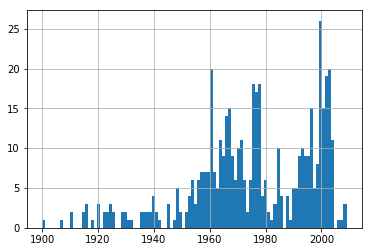

In [233]:
import matplotlib.pyplot as plt
plt.figure()
nandf = df[df['LotFrontage'].isnull()]
nandf['YearBuilt'].hist(bins = 100)
plt.show()
#plt.plot()
#nandf.pivot_table(values = 'LotFrontage', index = ['YearBuilt'], aggfunc = np.size).sort_values(by='LotFrontage', axis = 0)
#tt=nandf.pivot_table(values = 'LotFrontage', index = catclass, aggfunc = np.size)
#tt[tt['LotFrontage'].notnull()].sort_values(by='LotFrontage', axis = 0)
#tt.sort_values(by='LotFrontage', axis = 0)

In [256]:
vv=nandf.pivot_table(values = 'LotFrontage', index = ['YearBuilt'], aggfunc = np.size)#.sort_values(by='LotFrontage', axis = 0)
vv
#vv[vv['YearBuilt'] < 1940]
#vv=vv[vv['LotFrontage']]
#vv[vv.index > 1940]



,LotFrontage
YearBuilt,
1900,1.0
1907,1.0
1910,2.0
1915,2.0
1916,3.0
1918,1.0
1920,3.0
1922,2.0
1923,2.0


In [106]:
df['YearBuilt'].describe()

count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
25%      1953.500000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [127]:
yearlable = ['1910','1940', '1960', '1975', '1990', '2000', '2011']
yearbin = [38, 68, 88, 103, 118, 128, 139]
yearbin = [1872, 1910, 1940, 1960, 1975, 1990, 2000, 2010]
dd = df.copy() 
rr=pd.cut(x = dd['YearBuilt'].values, bins = yearbin, right = False, labels = yearlable)
dd['YInt'] = rr


In [133]:
#dd[dd['YearBuilt']<1910][['YInt', 'YearBuilt']]
dd.groupby(by = ['YInt']).count()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
YInt,,,,,,,,,,,,,,,,,,,,,
1910,66,66,65,64,66,66,29,66,66,66,...,66,0,15,2,66,66,66,66,66,66
1940,415,415,414,381,415,415,93,415,415,414,...,415,1,109,17,415,415,415,415,415,415
1960,491,491,489,431,491,491,19,491,491,490,...,491,0,141,28,491,491,491,490,491,491
1975,522,522,522,397,522,522,3,522,522,522,...,522,3,175,30,522,522,522,522,522,522
1990,310,310,310,216,310,310,1,310,310,310,...,310,3,86,12,310,310,310,310,310,310
2000,332,332,332,257,332,332,15,332,332,332,...,332,1,38,12,332,332,332,332,332,332
2011,780,780,780,684,780,780,37,780,780,780,...,780,2,7,4,780,780,780,780,780,780
